In [4]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Reading the data
exp_name = "00qpnw78"                     # 4wJ3GGzC 5yAGlOT6
# train_scores.nc path:
train_scores_path = f"/lustre_scratch/shaerdan/scores/train_scores_{exp_name}.nc"
# test_scores.nc path:
test_scores_path = f"/lustre_scratch/shaerdan/scores/test_scores_{exp_name}.nc"


ds_train_toy = xr.open_dataset(train_scores_path)
ds_test_toy = xr.open_dataset(test_scores_path)

print(ds_train_toy)
print(ds_test_toy)

save_plots_test = True
save_plots_train = True



<xarray.Dataset>
Dimensions:                            (box: 9990, x: 100, y: 100, channel: 1, tasmax_chan: 1, y2: 10, x2: 10, land_cover_chan: 1, tasmin_chan: 1, rainfall_chan: 1, model_output_channel: 1, model_output_y: 100, model_output_x: 100)
Coordinates:
  * box                                (box) int64 0 1 2 3 ... 9987 9988 9989
  * x                                  (x) int64 0 1 2 3 4 5 ... 95 96 97 98 99
  * y                                  (y) int64 0 1 2 3 4 5 ... 95 96 97 98 99
  * channel                            (channel) int64 0
Dimensions without coordinates: tasmax_chan, y2, x2, land_cover_chan, tasmin_chan, rainfall_chan, model_output_channel, model_output_y, model_output_x
Data variables: (12/76)
    ST_slices                          (box, channel, y, x) float32 ...
    SW_corner_x                        (box) int32 ...
    SW_corner_y                        (box) int32 ...
    cloud_free_fractions               (box) float64 ...
    box_time                 

In [ ]:
num_box = ds_train_toy.hires_estimate.shape[0]
mse = np.zeros(num_box)
vmin = np.zeros(num_box)
vmax = np.zeros(num_box)
rmse_values = []

for n in np.linspace(0,num_box-1,20,dtype=int): #range
    plt.figure(figsize=(12,4))  # Set a larger figure size

    vmin = min(ds_train_toy.ST_slices[n, 0, :, :].min(),ds_train_toy.hires_estimate[n, 0, :, :].min())
    vmax = max(ds_train_toy.ST_slices[n, 0, :, :].max(),ds_train_toy.hires_estimate[n, 0, :, :].max())    

    # Plot the estimated high resolution
    plt.subplot(1, 5, 1)  # 1 row, 2 columns, 1st subplot
    plt.pcolormesh(ds_train_toy.hires_estimate[n, 0, :, :], cmap='jet', vmin=vmin, vmax=vmax)          # , vmin=vmin[n], vmax=vmax[n])
    plt.colorbar()
    plt.title(f"Estimated High Res Box {n}")

    # Plot the actual high resolution
    plt.subplot(1, 5, 2)  # 1 row, 2 columns, 2nd subplot
    plt.pcolormesh(ds_train_toy.ST_slices[n, 0, :, :], cmap='jet', vmin=vmin, vmax=vmax)                   # , vmin=vmin[n], vmax=vmax[n])
    plt.colorbar()
    plt.title(f"Actual High Res Box {n}")

    # Plot the land cover
    plt.subplot(1, 5, 3)  # 1 row, 2 columns, 2nd subplot
    plt.pcolormesh(ds_train_toy.land_cover[n, 0, :, :], cmap='jet')                   # , vmin=vmin[n], vmax=vmax[n])
    plt.colorbar()
    plt.title(f"Land Cover Box {n}")    

    # Plot the urban area
    plt.subplot(1, 5, 4)  # 1 row, 2 columns, 2nd subplot
    plt.pcolormesh(ds_train_toy.albedo[n, 0, :, :], cmap='jet')                   # , vmin=vmin[n], vmax=vmax[n])
    plt.colorbar()
    plt.title(f"Urban fraction Box {n}")      

    # Plot the Suburban area
    plt.subplot(1, 5, 5)  # 1 row, 2 columns, 2nd subplot
    plt.pcolormesh(ds_train_toy.suburban_area[n, 0, :, :], cmap='jet')                   # , vmin=vmin[n], vmax=vmax[n])
    plt.colorbar()
    plt.title(f"Suburban fraction Box {n}")        
    
    plt.tight_layout(pad=1.0)
    plt.show()

#     plt.figure(figsize=(12,4))  # Set a larger figure size
#     plt.subplot(1, 3, 1)  # 1 row, 2 columns, 1st subplot
#     plt.pcolormesh(ds_train_toy.tasmax[n, 0, :, :], cmap='jet')          # , vmin=vmin[n], vmax=vmax[n])
#     plt.colorbar()
#     plt.title(f"Tasmax Box {n}")

#     # Plot the actual high resolution
#     plt.subplot(1, 3, 2)  # 1 row, 2 columns, 2nd subplot
#     plt.pcolormesh(ds_train_toy.tasmin[n, 0, :, :], cmap='jet')                   # , vmin=vmin[n], vmax=vmax[n])
#     plt.colorbar()
#     plt.title(f"Tasmin Box {n}")

#     # Plot the land cover
#     plt.subplot(1, 3, 3)  # 1 row, 2 columns, 2nd subplot
#     plt.pcolormesh(ds_train_toy.rainfall[n, 0, :, :], cmap='jet')                   # , vmin=vmin[n], vmax=vmax[n])
#     plt.colorbar()
#     plt.title(f"Rainfall Box {n}")  

    plt.show() 

    print(f"box time is {ds_train_toy.box_time[n].values}")   

    # Compute RMSE:
    difference = ds_train_toy.hires_estimate[n, 0, :, :] - ds_train_toy.ST_slices[n, 0, :, :]
    mse = np.mean(difference ** 2)
    rmse = np.sqrt(mse)
    rmse_values.append(rmse)

plt.plot(rmse_values)
plt.xlabel("Box number")
plt.ylabel("RMSE")
plt.title("RMSE for each box")
plt.show()

    


In [ ]:
from matplotlib.backends.backend_pdf import PdfPages

# Open a PDF file
if save_plots_train:
    with PdfPages(f"train_results_{exp_name}.pdf") as pdf:

        rmse_values = []

        for n in np.linspace(0, num_box - 1, num_box, dtype=int):  # Loop over boxes
            vmin = []
            vmax = []

            plt.figure(figsize=(12, 4))  # Set a larger figure size
            # Setting min and max values for color maps
            vmin.append(ds_train_toy.ST_slices[n, 0, :, :].min())
            vmax.append(ds_train_toy.ST_slices[n, 0, :, :].max())

            # Plot the estimated high-resolution
            plt.subplot(1, 3, 1)  # 1 row, 3 columns, 1st subplot
            plt.pcolormesh(
                ds_train_toy.hires_estimate[n, 0, :, :],
                cmap="jet",
                vmin=vmin[0],
                vmax=vmax[0],
            )
            plt.colorbar()
            plt.title(f"Estimated High Res Box {n}, box time: {ds_train_toy.box_time[n].values}")

            # Plot the actual high-resolution
            plt.subplot(1, 3, 2)  # 2nd subplot
            plt.pcolormesh(
                ds_train_toy.ST_slices[n, 0, :, :], cmap="jet", vmin=vmin[0], vmax=vmax[0]
            )
            plt.colorbar()
            plt.title(f"Actual High Res Box {n}")

            # Plot the land cover
            plt.subplot(1, 3, 3)  # 3rd subplot
            plt.pcolormesh(ds_train_toy.land_cover[n, 0, :, :], cmap="jet")
            plt.colorbar()
            plt.title(f"Land Cover Box {n}")

            pdf.savefig()  # Save the current figure to the PDF
            plt.close()  # Close the current figure to avoid memory overflow

            # Calculate RMSE for each box
            difference = ds_train_toy.hires_estimate[n, 0, :, :] - ds_train_toy.ST_slices[n, 0, :, :]
            mse = np.mean(difference ** 2)
            rmse = np.sqrt(mse)
            rmse_values.append(rmse)

        # Plot RMSE for all boxes
        plt.figure()
        plt.plot(rmse_values)
        plt.xlabel("Box number")
        plt.ylabel("RMSE")
        plt.title("RMSE for each box")

        pdf.savefig()  # Save the RMSE plot to the PDF
        plt.close()  # Close the current figure

In [5]:
num_box = ds_test_toy.hires_estimate.shape[0]


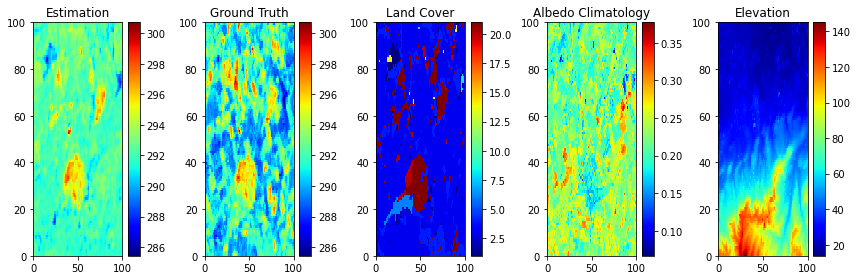

Date 2016-04-20T10:51:56.000000000


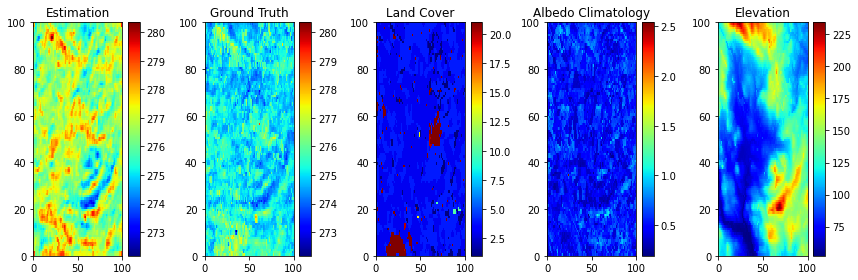

Date 2022-02-04T11:15:47.000000000


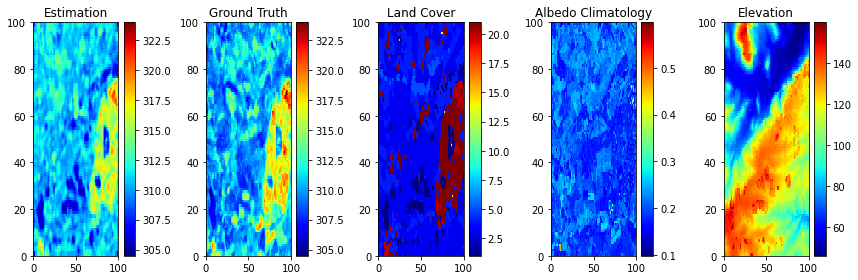

Date 2019-07-25T10:58:10.000000000


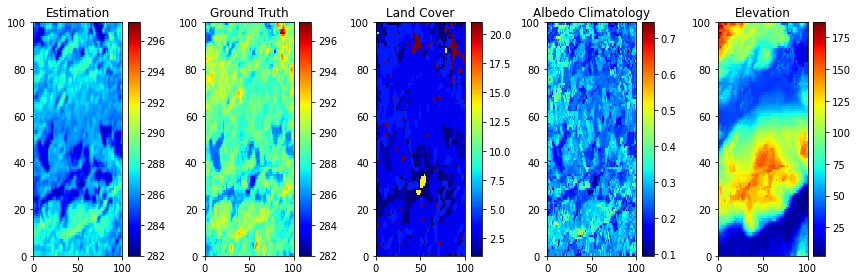

Date 2021-03-20T11:21:31.000000000


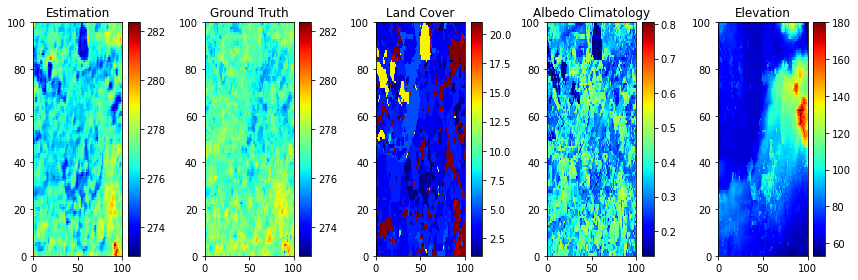

Date 2018-02-12T10:58:23.000000000


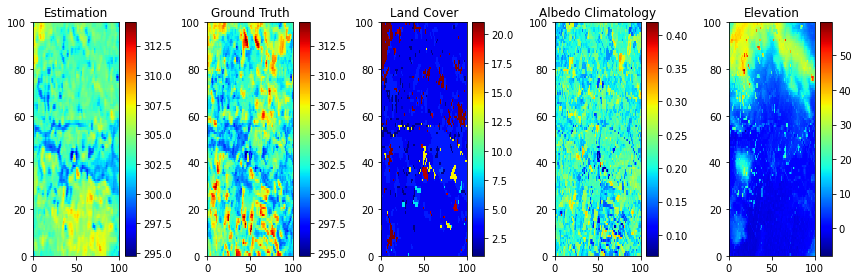

Date 2015-08-08T10:51:38.000000000


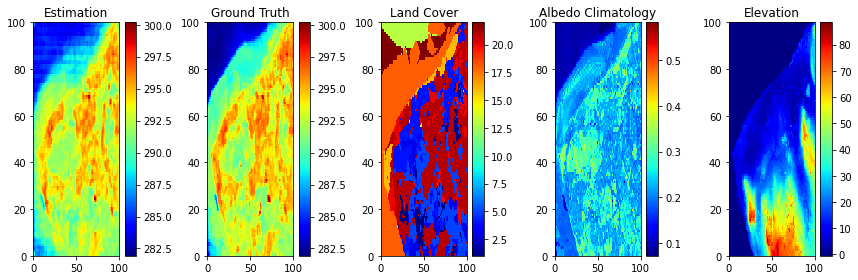

Date 2022-03-25T11:09:56.000000000


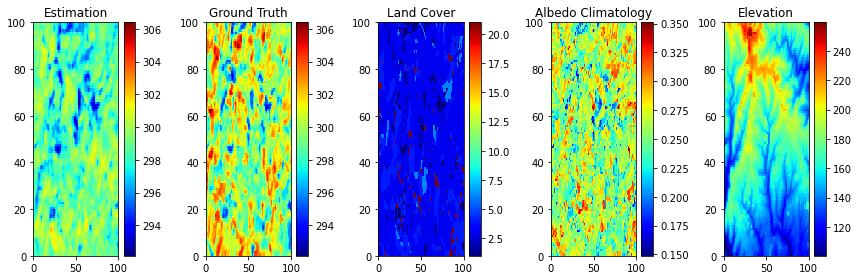

Date 2020-09-13T10:58:48.000000000


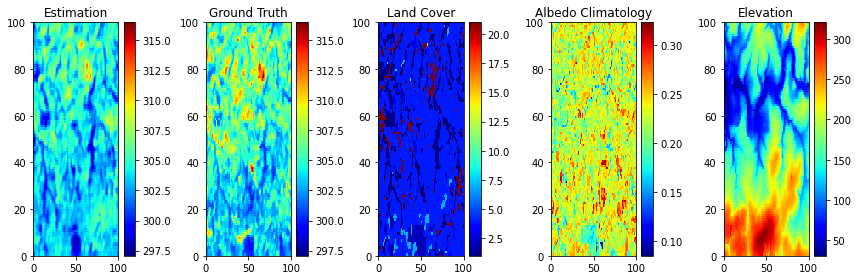

Date 2014-07-25T11:10:49.000000000


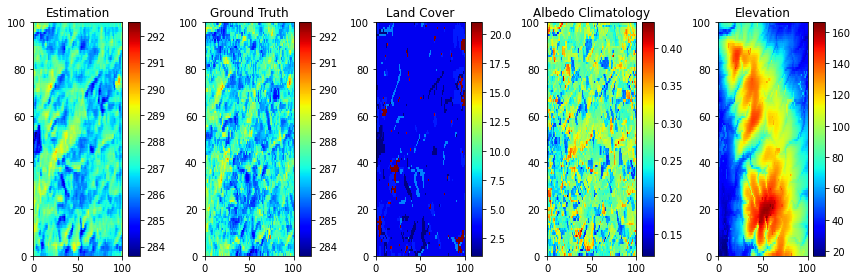

Date 2022-03-18T11:03:51.000000000


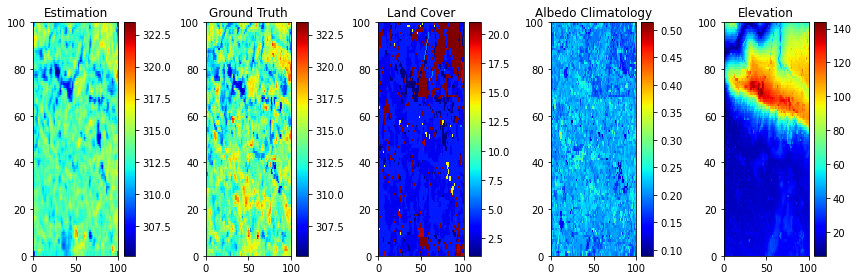

Date 2022-07-18T10:52:15.000000000


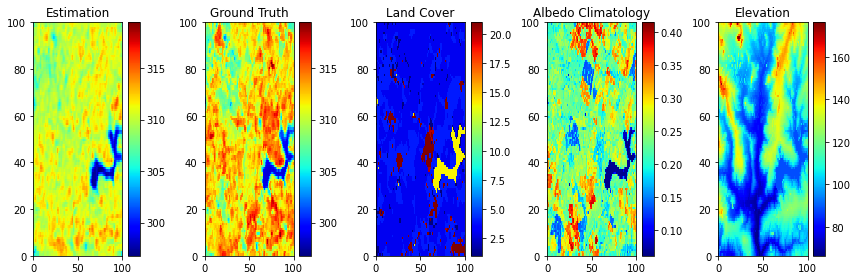

Date 2022-08-10T10:58:20.000000000


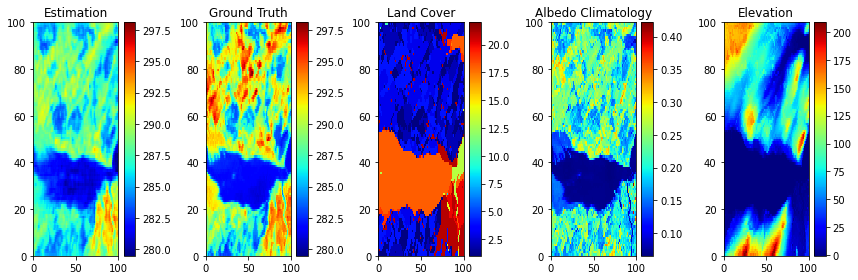

Date 2021-04-21T11:21:20.000000000


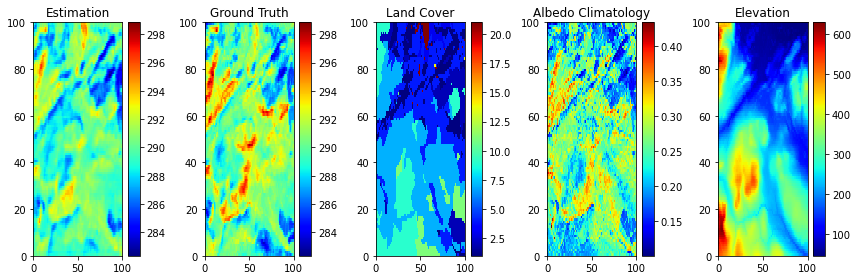

Date 2015-04-05T11:21:04.000000000


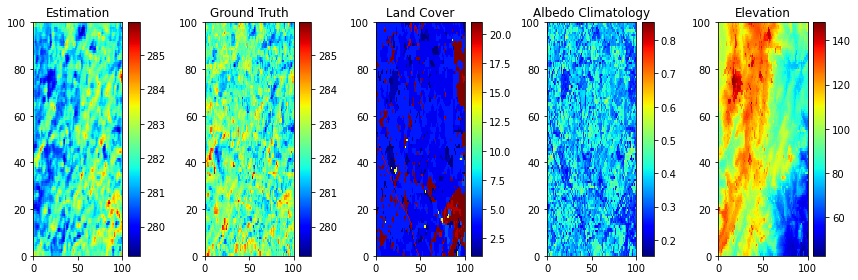

Date 2019-02-15T10:57:55.000000000


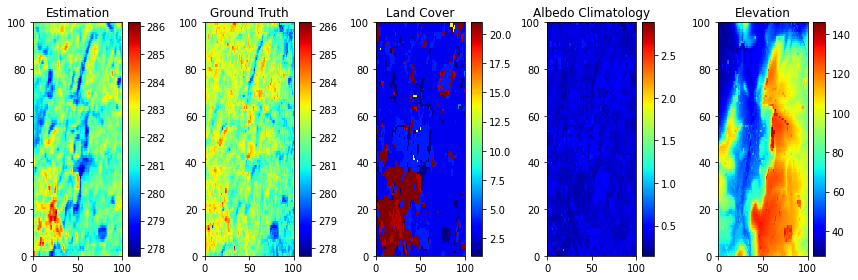

Date 2019-02-15T10:57:55.000000000


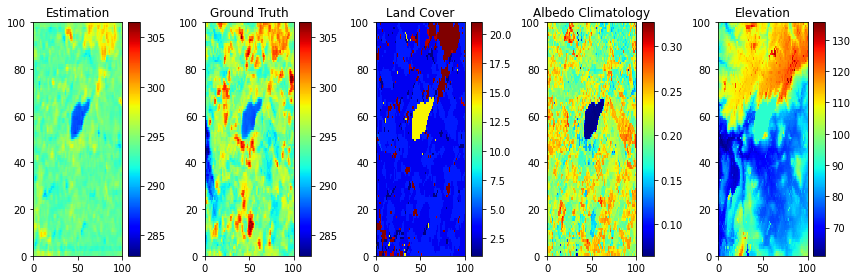

Date 2019-05-13T11:03:54.000000000


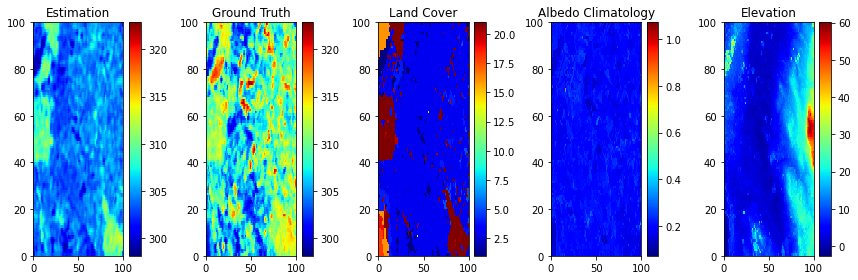

Date 2018-07-04T11:09:13.000000000


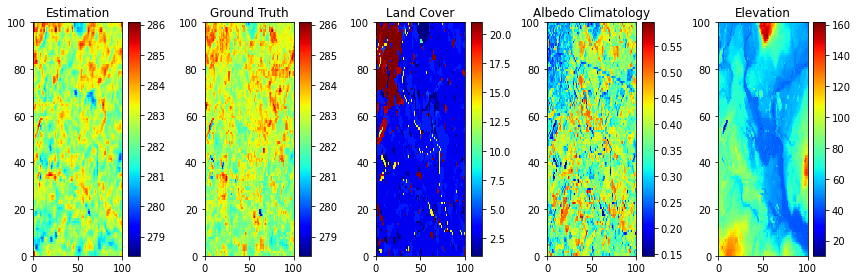

Date 2019-02-22T11:04:04.000000000


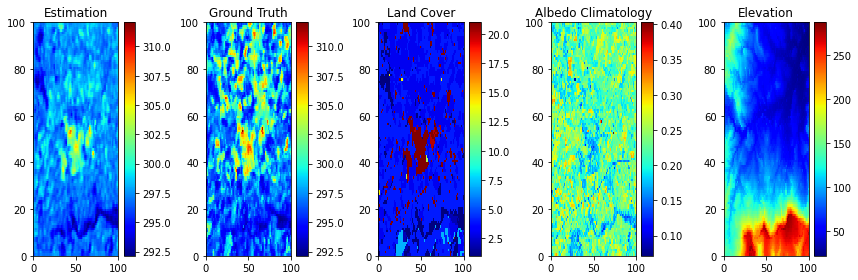

Date 2014-05-15T11:04:18.000000000


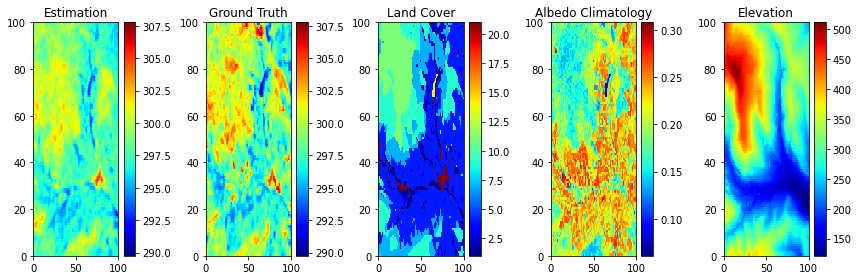

Date 2015-06-10T11:08:59.000000000


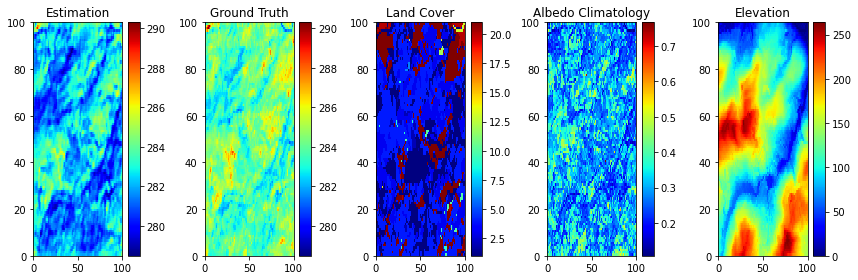

Date 2021-02-27T11:03:57.000000000


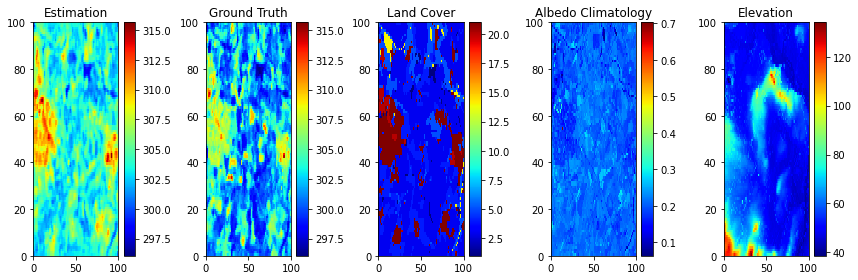

Date 2013-07-08T11:00:34.000000000


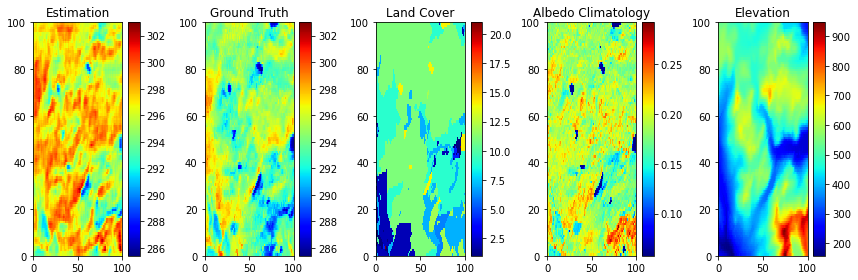

Date 2022-06-03T11:20:50.000000000


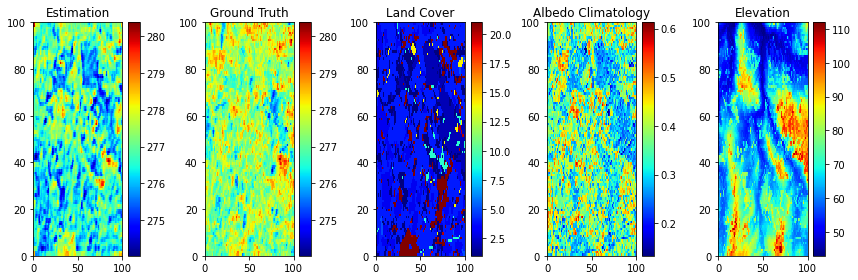

Date 2018-02-12T10:58:23.000000000


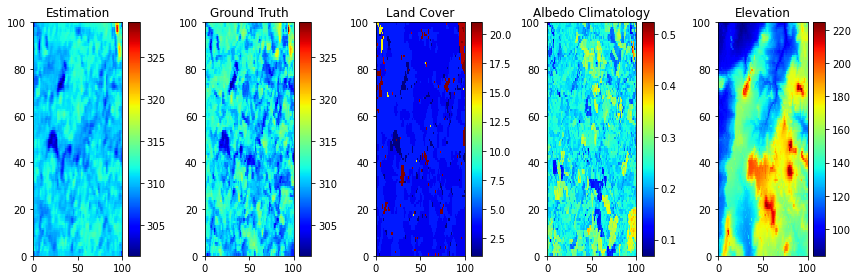

Date 2022-08-10T10:58:20.000000000


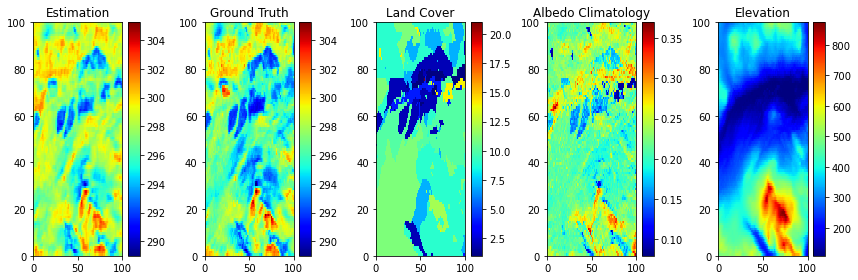

Date 2021-08-27T11:21:54.000000000


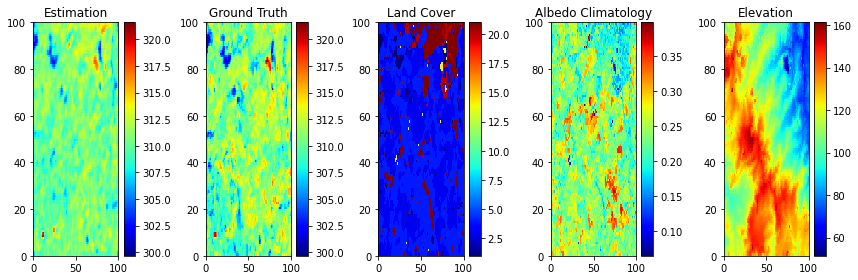

Date 2022-08-10T10:58:44.000000000


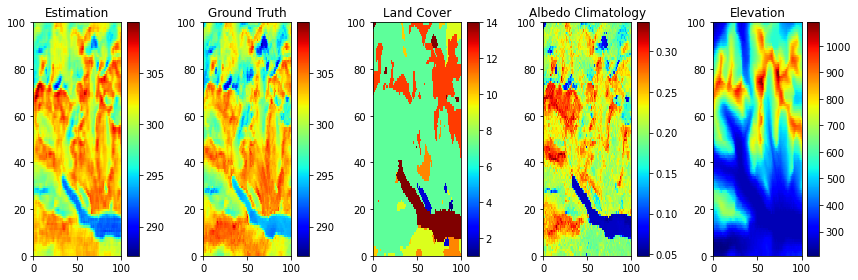

Date 2022-08-13T11:28:04.000000000


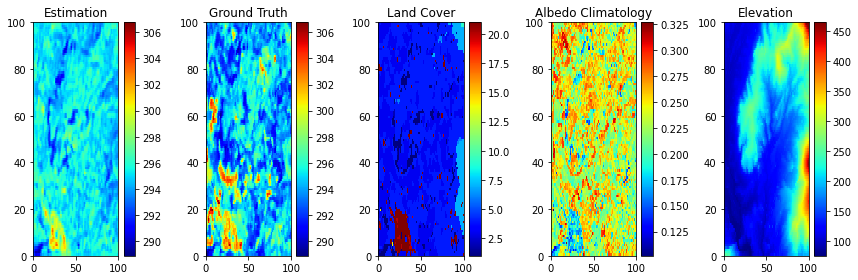

Date 2017-05-07T11:03:41.000000000


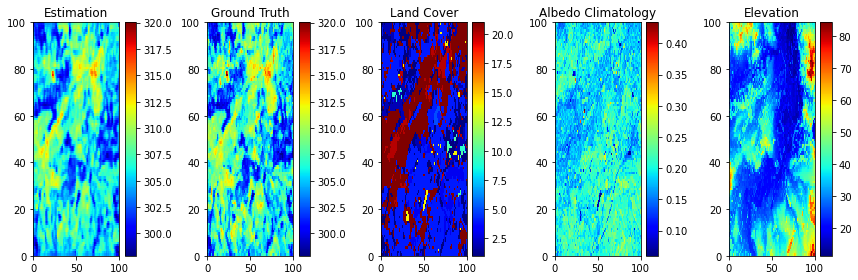

Date 2018-06-29T10:51:26.000000000


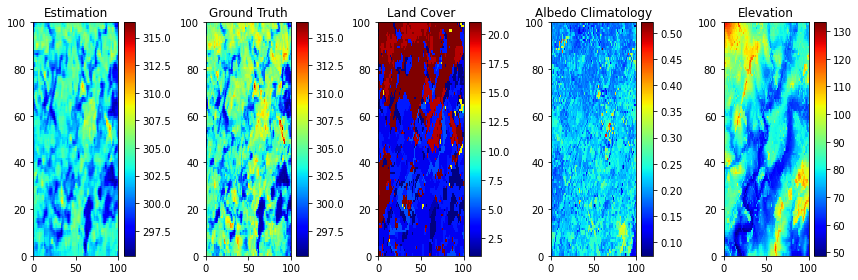

Date 2022-08-26T10:58:24.000000000


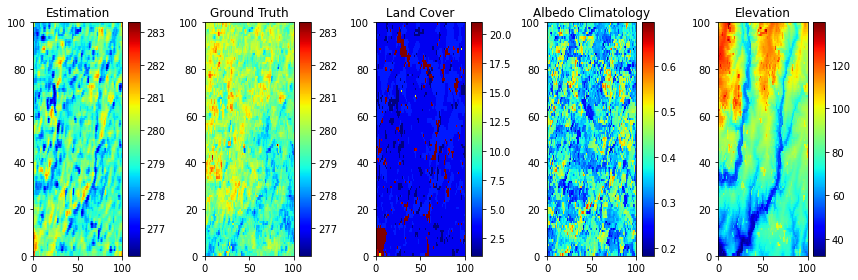

Date 2022-02-07T10:58:18.000000000


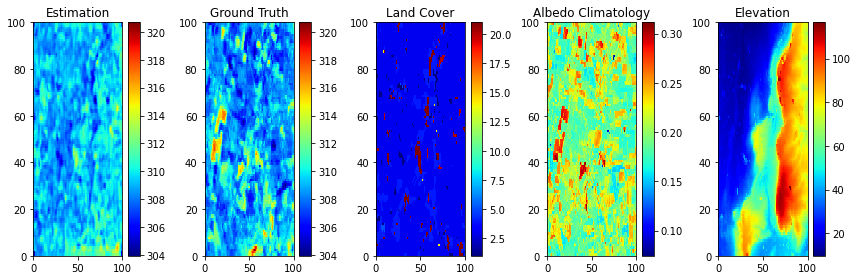

Date 2019-07-25T10:58:10.000000000


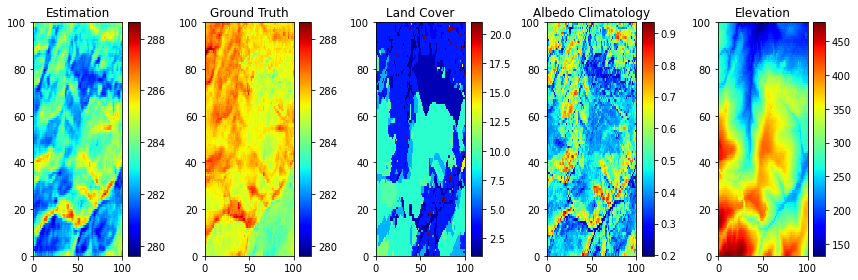

Date 2022-11-13T11:04:31.000000000


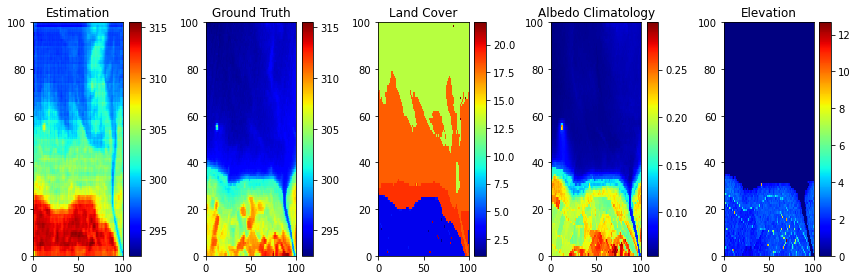

Date 2020-08-12T10:58:09.000000000


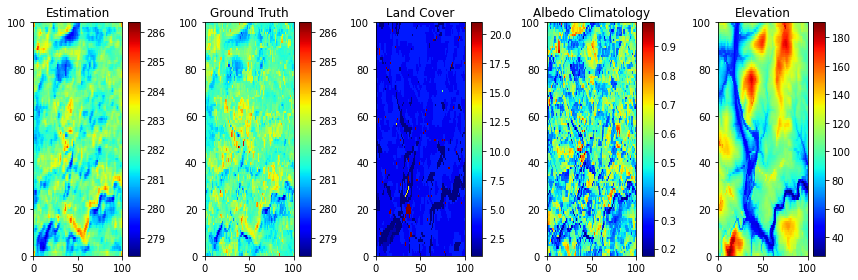

Date 2022-11-03T11:15:55.000000000


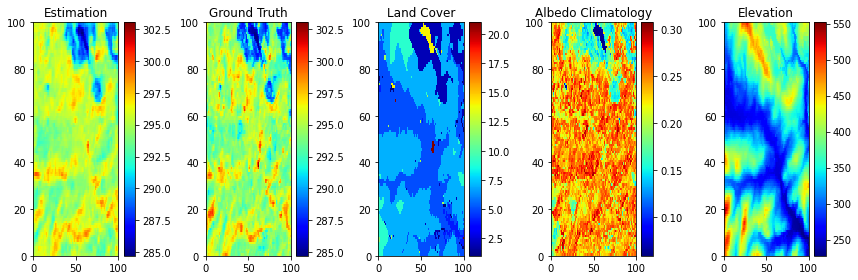

Date 2020-05-06T11:09:56.000000000


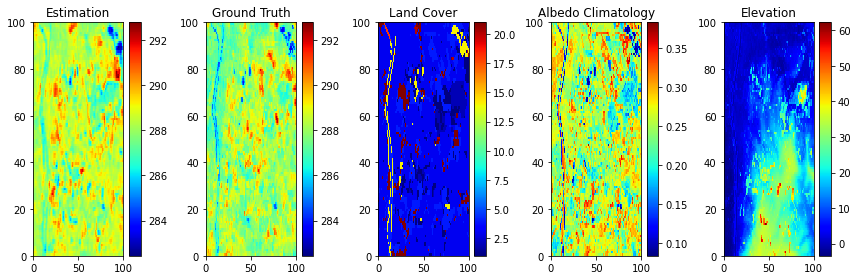

Date 2022-03-19T10:58:10.000000000


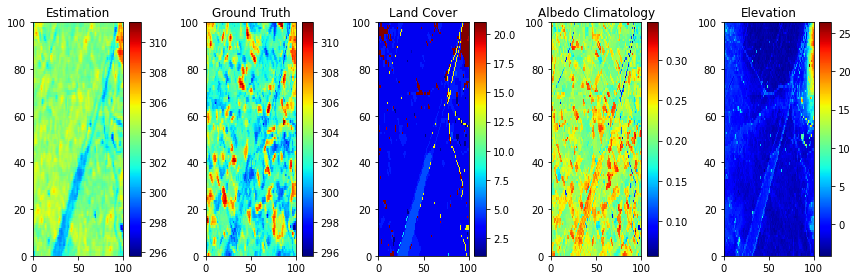

Date 2015-08-08T10:51:38.000000000


In [6]:
num_samples = 40

random_indices = np.random.choice(num_box, num_samples, replace=False)

vmin = np.zeros(num_box)
vmax = np.zeros(num_box)
for n in random_indices:
    plt.figure(figsize=(12, 4))  # Set a larger figure size

    vmin[n] = min(ds_test_toy.ST_slices[n, 0, :, :].min(),ds_test_toy.hires_estimate[n, 0, :, :].min())
    vmax[n] = max(ds_test_toy.ST_slices[n, 0, :, :].max(),ds_test_toy.hires_estimate[n, 0, :, :].max())    

    # Plot the estimated high resolution
    plt.subplot(1, 5, 1)  # 1 row, 4 columns, 1st subplot
    plt.pcolormesh(ds_test_toy.hires_estimate[n, 0, :, :], cmap='jet', vmin=vmin[n], vmax=vmax[n])
    plt.colorbar()
    plt.title(f"Estimation")

    # Plot the actual high resolution
    plt.subplot(1, 5, 2)  # 1 row, 4 columns, 2nd subplot
    plt.pcolormesh(ds_test_toy.ST_slices[n, 0, :, :], cmap='jet', vmin=vmin[n], vmax=vmax[n])
    plt.colorbar()
    plt.title(f"Ground Truth")

    # Plot the land cover
    plt.subplot(1, 5, 3)  # 1 row, 4 columns, 3rd subplot
    plt.pcolormesh(ds_test_toy.land_cover[n, 0, :, :], cmap='jet')
    plt.colorbar()
    plt.title(f"Land Cover")   
    
    # Plot the albedo
    plt.subplot(1, 5, 4)  # 1 row, 4 columns, 4th subplot
    plt.pcolormesh(ds_test_toy.albedo[n, 0, :, :], cmap='jet')
    plt.colorbar()
    plt.title(f"Albedo Climatology")     
    
    # Plot the albedo
    plt.subplot(1, 5, 5)  # 1 row, 4 columns, 4th subplot
    plt.pcolormesh(ds_test_toy.elevation[n, 0, :, :], cmap='jet')
    plt.colorbar()
    plt.title(f"Elevation")        

    plt.tight_layout()
    plt.show()

    print(f"Date {ds_test_toy.box_time[n].values}")


In [ ]:
import pandas as pd
from scipy.stats import pearsonr

# Number of samples you want to select per month
num_samples_per_month = 10

# Extract the month from box_time and add it as a new coordinate
months = ds_test_toy.box_time.dt.month

# Function to compute Pearson correlation coefficient for 2D arrays
def compute_pearson_corr(arr1, arr2):
    arr1_flat = arr1.flatten()
    arr2_flat = arr2.flatten()
    return pearsonr(arr1_flat, arr2_flat)[0]

# Loop through each unique month
for month in np.unique(months):
    # Get the indices for the current month
    month_indices = np.where(months == month)[0]
    
    # If there are fewer samples than requested, use all available samples
    num_samples = min(num_samples_per_month, len(month_indices))
    
    # Randomly choose num_samples indices from the current month's indices
    random_indices = np.random.choice(month_indices, num_samples, replace=False)
    
    vmin = np.zeros(len(random_indices))
    vmax = np.zeros(len(random_indices))
    for i, n in enumerate(random_indices):
        plt.figure(figsize=(16, 4))  # Set a larger figure size

        vmin[i] = min(ds_test_toy.ST_slices[n, 0, :, :].min(), ds_test_toy.hires_estimate[n, 0, :, :].min())
        vmax[i] = max(ds_test_toy.ST_slices[n, 0, :, :].max(), ds_test_toy.hires_estimate[n, 0, :, :].max())    

        # Plot the estimated high resolution
        plt.subplot(1, 5, 1)  # 1 row, 4 columns, 1st subplot
        plt.pcolormesh(ds_test_toy.hires_estimate[n, 0, :, :], cmap='jet', vmin=vmin[i], vmax=vmax[i])
        plt.colorbar()
        plt.title(f"Estimation - Month {month}")

        # Plot the actual high resolution
        plt.subplot(1, 5, 2)  # 1 row, 4 columns, 2nd subplot
        plt.pcolormesh(ds_test_toy.ST_slices[n, 0, :, :], cmap='jet', vmin=vmin[i], vmax=vmax[i])
        plt.colorbar()
        plt.title(f"Ground Truth - Month {month}")

        # Plot the land cover
        plt.subplot(1, 5, 3)  # 1 row, 4 columns, 3rd subplot
        plt.pcolormesh(ds_test_toy.land_cover[n, 0, :, :], cmap='jet')
        plt.colorbar()
        plt.title(f"Land Cover - Month {month}")    
        
        # Plot the albedo
        plt.subplot(1, 5, 4)  # 1 row, 4 columns, 4th subplot
        plt.pcolormesh(ds_test_toy.albedo[n, 0, :, :], cmap='jet')
        plt.colorbar()
        plt.title(f"Albedo Climatology - Month {month}")     
        
        # Plot the elevation
        plt.subplot(1, 5, 5)  # 1 row, 4 columns, 4th subplot
        plt.pcolormesh(ds_test_toy.elevation[n, 0, :, :], cmap='jet')
        plt.colorbar()
        plt.title(f"Elevation - Month {month}")                 

        plt.tight_layout()        
        plt.show()

        # Compute Pearson correlation for albedo vs ST_slices
        pearson_albedo_st = compute_pearson_corr(ds_test_toy.albedo[n, 0, :, :].data, ds_test_toy.ST_slices[n, 0, :, :].data)
        
        # Compute Pearson correlation for hires_estimate vs ST_slices
        pearson_hires_st = compute_pearson_corr(ds_test_toy.hires_estimate[n, 0, :, :].data, ds_test_toy.ST_slices[n, 0, :, :].data)
        
        print(f"Date {ds_test_toy.box_time[n].values}")
        print(f"Pearson correlation (Albedo vs ST_slices) for Box {n}: {pearson_albedo_st:.4f}")
        print(f"Pearson correlation (hires_estimate vs ST_slices) for Box {n}: {pearson_hires_st:.4f}")


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Function to compute Pearson correlation coefficient for 2D arrays
def compute_pearson_corr(arr1, arr2):
    arr1_flat = arr1.flatten()
    arr2_flat = arr2.flatten()
    return pearsonr(arr1_flat, arr2_flat)[0]

# Extract the coordinates as numpy arrays
sw_x = ds_test_toy['SW_corner_x'].values
sw_y = ds_test_toy['SW_corner_y'].values

# For unique operation
coords = np.vstack((sw_x, sw_y)).T

# Coordinate pairs
unique_coords = np.unique(coords, axis=0)

# Minimum number of time points threshold
min_time_points = 15  
num_samples = 2

# List to store suitable coordinates with enough time points
suitable_coords = []

# Check each coordinate for enough time points
for i, coord in enumerate(unique_coords):
    coord_indices = np.where((sw_x == coord[0]) & (sw_y == coord[1]))[0]
    if len(coord_indices) >= min_time_points:
        suitable_coords.append(coord)

# Randomly choose several suitable coordinates to process
selected_coords = np.random.choice(len(suitable_coords), size=min(len(suitable_coords), num_samples), replace=False)

# Process each selected coordinate
for coord_index in selected_coords:
    random_coord = suitable_coords[coord_index]
    print(f"Processing coordinate: {random_coord}")

    # Get all indices for the chosen coordinate
    coord_indices = np.where((sw_x == random_coord[0]) & (sw_y == random_coord[1]))[0]

    # Sort indices by time
    sorted_indices = np.argsort(ds_test_toy.box_time.values[coord_indices])
    sorted_coord_indices = coord_indices[sorted_indices]  # Apply the sorted order to the actual indices

    # Plotting the data over time for the selected coordinates
    for idx in sorted_coord_indices:
        plt.figure(figsize=(16, 4))  # Create a new figure for each time point
        time_str = ds_test_toy.box_time[idx].values.astype('datetime64[D]').astype(str)
        vmin = min(ds_test_toy.ST_slices[idx, 0, :, :].min(), ds_test_toy.hires_estimate[idx, 0, :, :].min())
        vmax = max(ds_test_toy.ST_slices[idx, 0, :, :].max(), ds_test_toy.hires_estimate[idx, 0, :, :].max())    
        # Plot the estimated high resolution
        plt.subplot(1, 5, 1)  # 1 row, 4 columns, 1st subplot
        plt.pcolormesh(ds_test_toy.hires_estimate[idx, 0, :, :], cmap='jet', vmin=vmin, vmax=vmax)
        plt.colorbar()
        plt.title(f"Estimation")

        # Plot the actual high resolution
        plt.subplot(1, 5, 2)  # 1 row, 4 columns, 2nd subplot
        plt.pcolormesh(ds_test_toy.ST_slices[idx, 0, :, :], cmap='jet', vmin=vmin, vmax=vmax)
        plt.colorbar()
        plt.title(f"Ground Truth")

        # Plot the land cover
        plt.subplot(1, 5, 3)  # 1 row, 4 columns, 3rd subplot
        plt.pcolormesh(ds_test_toy.land_cover[idx, 0, :, :], cmap='jet')
        plt.colorbar()
        plt.title(f"Land Cover")    
        
        # Plot the albedo
        plt.subplot(1, 5, 4)  # 1 row, 4 columns, 4th subplot
        plt.pcolormesh(ds_test_toy.albedo[idx, 0, :, :], cmap='jet')
        plt.colorbar()
        plt.title(f"Albedo Climatology")     
        
        # Plot the elevation
        plt.subplot(1, 5, 5)  # 1 row, 4 columns, 4th subplot
        plt.pcolormesh(ds_test_toy.elevation[idx, 0, :, :], cmap='jet')
        plt.colorbar()
        plt.title(f"Elevation")   
        plt.tight_layout()
        plt.show()

        # Compute and display Pearson correlations if needed
        pearson_albedo_st = compute_pearson_corr(ds_test_toy.albedo[idx, 0, :, :].data, ds_test_toy.ST_slices[idx, 0, :, :].data)
        pearson_hires_st = compute_pearson_corr(ds_test_toy.hires_estimate[idx, 0, :, :].data, ds_test_toy.ST_slices[idx, 0, :, :].data)

        print(f"Date: {ds_test_toy.box_time[idx].values}")
#         print(f"Pearson correlation (Albedo vs ST_slices): {pearson_albedo_st:.4f}")
#         print(f"Pearson correlation (hires_estimate vs ST_slices): {pearson_hires_st:.4f}")
        print(f"Location is {sw_x[idx], sw_y[idx]}")  # This should always match the "Processing coordinate"


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from matplotlib.backends.backend_pdf import PdfPages

# Function to compute Pearson correlation coefficient for 2D arrays
def compute_pearson_corr(arr1, arr2):
    arr1_flat = arr1.flatten()
    arr2_flat = arr2.flatten()
    return pearsonr(arr1_flat, arr2_flat)[0]

# Extract the coordinates as numpy arrays
sw_x = ds_test_toy['SW_corner_x'].values
sw_y = ds_test_toy['SW_corner_y'].values

# For unique operation
coords = np.vstack((sw_x, sw_y)).T

# Coordinate pairs
unique_coords = np.unique(coords, axis=0)

# Minimum number of time points threshold
min_time_points = 10  # Define your threshold here
num_samples = 10

# List to store suitable coordinates with enough time points
suitable_coords = []

# Check each coordinate for enough time points
for i, coord in enumerate(unique_coords):
    coord_indices = np.where((sw_x == coord[0]) & (sw_y == coord[1]))[0]
    if len(coord_indices) >= min_time_points:
        suitable_coords.append(coord)

# Randomly choose several suitable coordinates to process
selected_coords = np.random.choice(len(suitable_coords), size=min(len(suitable_coords), num_samples), replace=False)

# Create a PDF file to save the plots
with PdfPages(f'/lustre_scratch/shaerdan/pdfs/test_boxes_{exp_name}_v0.pdf') as pdf:
    # Process each selected coordinate
    for coord_index in selected_coords:
        random_coord = suitable_coords[coord_index]
        print(f"Processing coordinate: {random_coord}")

        # Get all indices for the chosen coordinate
        coord_indices = np.where((sw_x == random_coord[0]) & (sw_y == random_coord[1]))[0]

        # Sort indices by time
        sorted_indices = np.argsort(ds_test_toy.box_time.values[coord_indices])
        sorted_coord_indices = coord_indices[sorted_indices]  # Apply the sorted order to the actual indices

        # Plotting the data over time for the selected coordinates
        for idx in sorted_coord_indices:
            fig, axs = plt.subplots(1, 4, figsize=(20, 6))  # Increased figure height to accommodate text

            # Setup each plot
            plots = ['hires_estimate', 'ST_slices', 'land_cover', 'albedo']
            titles = ['High-resolution estimate', 'Actual high-resolution slices', 'Land cover', 'Albedo']
            vmin = min(ds_test_toy.ST_slices[idx, 0, :, :].min(), ds_test_toy.hires_estimate[idx, 0, :, :].min())
            vmax = max(ds_test_toy.ST_slices[idx, 0, :, :].max(), ds_test_toy.hires_estimate[idx, 0, :, :].max())            
            for i, plot in enumerate(plots):
                ax = axs[i]
                if plot in ['hires_estimate', 'ST_slices']:
                    pcm = ax.pcolormesh(getattr(ds_test_toy, plot)[idx, 0, :, :], cmap='jet', vmin=vmin, vmax=vmax)
                else:
                    pcm = ax.pcolormesh(getattr(ds_test_toy, plot)[idx, 0, :, :], cmap='jet')
                fig.colorbar(pcm, ax=ax)
                time_str = ds_test_toy.box_time[idx].values.astype('datetime64[D]').astype(str)
                ax.set_title(f"{titles[i]} Time: {time_str}")

            # Compute Pearson correlations
            pearson_albedo_st = compute_pearson_corr(ds_test_toy.albedo[idx, 0, :, :].data, ds_test_toy.ST_slices[idx, 0, :, :].data)
            pearson_hires_st = compute_pearson_corr(ds_test_toy.hires_estimate[idx, 0, :, :].data, ds_test_toy.ST_slices[idx, 0, :, :].data)

            # Add text annotation below the plots
            text_info = (f"Location: {sw_x[idx], sw_y[idx]}\n"
                         f"Time: {ds_test_toy.box_time[idx].values}\n"
                         f"Pearson correlation (Albedo vs ST slices): {pearson_albedo_st:.4f}\n"
                         f"Pearson correlation (hires estimate vs ST slices): {pearson_hires_st:.4f}")
            plt.figtext(0.5, 0.01, text_info, ha='center', va='bottom', fontsize=10)

            # Adjust layout to include text annotations
            plt.tight_layout(rect=[0, 0.2, 1, 0.95])  # Adjust the rect to leave more space at the bottom for text
            pdf.savefig(fig)  # Save the current figure into the PDF
            plt.close(fig)


In [ ]:
if save_plots_test:
    pdf_file_path = f"test_results_{exp_name}.pdf"
    with PdfPages(pdf_file_path) as pdf:

        # Initialize variables
        num_box = ds_test_toy.hires_estimate.shape[0]
        vmin = np.zeros(num_box)
        vmax = np.zeros(num_box)

        # Loop through a set of box indices
        for n in np.linspace(0, num_box - 1, num_box, dtype=int):  # 40 samples from 0 to num_box-1
            plt.figure(figsize=(12, 4))  # Set a larger figure size for plots

            # Calculate min and max values for each box to use in plots
            vmin[n] = ds_test_toy.ST_slices[n, 0, :, :].min()
            vmax[n] = ds_test_toy.ST_slices[n, 0, :, :].max()

            # Plot the estimated high resolution
            plt.subplot(1, 3, 1)  # 1 row, 3 columns, 1st subplot
            plt.pcolormesh(
                ds_test_toy.hires_estimate[n, 0, :, :],
                cmap="jet",
                vmin=vmin[n],
                vmax=vmax[n],
            )
            plt.colorbar()
            plt.title(f"Estimated High Res Box {n}, box time: {ds_test_toy.box_time[n].values}")

            # Plot the actual high resolution
            plt.subplot(1, 3, 2)  # 2nd subplot
            plt.pcolormesh(ds_test_toy.ST_slices[n, 0, :, :], cmap="jet")
            plt.colorbar()
            plt.title(f"Actual High Res Box {n}")

            # Plot the land cover
            plt.subplot(1, 3, 3)  # 3rd subplot
            plt.pcolormesh(ds_test_toy.land_cover[n, 0, :, :], cmap="jet")
            plt.colorbar()
            plt.title(f"Land Cover Box {n}")

            # Save the current plot to the PDF
            pdf.savefig()
            plt.close()  # Close the current figure to save memory

            # Print additional information
            box_time = ds_test_toy.box_time[n].values
            mse = np.mean(
                (ds_test_toy.hires_estimate[n, 0, :, :] - ds_test_toy.ST_slices[n, 0, :, :]) ** 2
            )

        print(f"Plots and data have been saved to {pdf_file_path}.")

In [ ]:

# compute the mean of ds_train_toy.hires_estimate[n, 0, :, :] for each box n, and compute the mean of ds_train_toy.ST_slices[n, 0, :, :] for each box n:
mean_hires_estimate = np.zeros(num_box)
mean_ST_slices = np.zeros(num_box)
mean_hires_estimate = ds_train_toy.hires_estimate.mean(dim=("model_output_y", "model_output_x"))
mean_ST_slices = ds_train_toy.ST_slices.mean(dim=("y", "x"))

mean_tasmax = ds_train_toy.tasmax.mean(dim=("y", "x"))
mean_tasmin = ds_train_toy.tasmin.mean(dim=("y", "x"))


var_hires_estimate = ds_train_toy.hires_estimate.var(dim=("model_output_y", "model_output_x"))
var_ST_slices = ds_train_toy.ST_slices.var(dim=("y", "x"))
var_tasmax = ds_train_toy.tasmax.var(dim=("y", "x"))
var_tasmin = ds_train_toy.tasmin.var(dim=("y", "x"))

# plot mean_hires_estimate and mean_ST_slices
plt.figure(figsize=(12,4))  # Set a larger figure size
plt.plot(mean_hires_estimate, label='mean_hires_estimate')
plt.plot(mean_ST_slices, label='mean_ST_slices')
plt.plot(mean_tasmax, label='mean_tasmax')
plt.plot(mean_tasmin, label='mean_tasmin')
plt.legend()
plt.title("Mean of the variables in the training dataset")
plt.show()


# plot mean_hires_estimate and mean_ST_slices
plt.figure(figsize=(12,4))  # Set a larger figure size
plt.plot(var_hires_estimate, label='var_hires_estimate')
plt.plot(var_ST_slices, label='var_ST_slices')
plt.plot(var_tasmax, label='var_tasmax')
plt.plot(var_tasmin, label='var_tasmin')
plt.legend()
plt.title("Variance of the variables in the training dataset")
plt.show()

# Calculate the Pearson correlation coefficient using xarray's built-in functionality
pearson_correlation_train = xr.corr(mean_hires_estimate, mean_ST_slices, dim='box')

# Print the Pearson correlation coefficient
print("Pearson correlation coefficient:", pearson_correlation_train.values)


  



In [ ]:
mean_ST_slices_values = mean_ST_slices.values
mean_tasmin_values = mean_tasmin.values

# Ensure both arrays have the same shape
if mean_ST_slices_values.shape == mean_tasmin_values.shape:
    # Compute the condition directly on the numpy arrays
    condition_met_indices = np.where(mean_ST_slices_values < (mean_tasmin_values - 10))

    # Extract anomalies based on the condition
    anomalies = mean_ST_slices_values[condition_met_indices]
    print(f"Anomalies: {condition_met_indices}, numbers of anomalies: {len(condition_met_indices[0])}" )
else:
    print("Error: Arrays do not have the same shape!")

In [ ]:
num_box = ds_test_toy.hires_estimate.shape[0]
mse = np.zeros(num_box)

# compute the mean of ds_train_toy.hires_estimate[n, 0, :, :] for each box n, and compute the mean of ds_train_toy.ST_slices[n, 0, :, :] for each box n:
mean_hires_estimate = np.zeros(num_box)
mean_ST_slices = np.zeros(num_box)
mean_hires_estimate = ds_test_toy.hires_estimate.mean(dim=("model_output_y", "model_output_x"))
mean_ST_slices = ds_test_toy.ST_slices.mean(dim=("y", "x"))
mean_tasmax = ds_test_toy.tasmax.mean(dim=("y", "x"))
mean_tasmin = ds_test_toy.tasmin.mean(dim=("y", "x"))

var_hires_estimate = ds_test_toy.hires_estimate.var(dim=("model_output_y", "model_output_x"))
var_ST_slices = ds_test_toy.ST_slices.var(dim=("y", "x"))
var_tasmax = ds_test_toy.tasmax.var(dim=("y", "x"))
var_tasmin = ds_test_toy.tasmin.var(dim=("y", "x"))

# plot mean_hires_estimate and mean_ST_slices
plt.figure(figsize=(12,4))  # Set a larger figure size
plt.plot(mean_hires_estimate, label='mean_hires_estimate')
plt.plot(mean_ST_slices, label='mean_ST_slices')
plt.plot(mean_tasmax, label='mean_tasmax')
plt.plot(mean_tasmin, label='mean_tasmin')
plt.legend()
plt.title("Mean of the variables in the testing dataset")
plt.show()

plt.figure(figsize=(12,4))  # Set a larger figure size
plt.plot(var_hires_estimate, label='var_hires_estimate')
plt.plot(var_ST_slices, label='var_ST_slices')
plt.plot(var_tasmax, label='var_tasmax')
plt.plot(var_tasmin, label='var_tasmin')
plt.legend()
plt.title("Variance of the variables in the testing dataset")
plt.show()

# Calculate the Pearson correlation coefficient using xarray's built-in functionality
pearson_correlation_test = xr.corr(mean_hires_estimate, mean_ST_slices, dim='box')

# Print the Pearson correlation coefficient
print("Pearson correlation coefficient:", pearson_correlation_test.values)


In [ ]:

# Calculate the difference between var_hires_estimate and var_ST_slices
diff = abs(var_hires_estimate - var_ST_slices)

# Apply the condition to filter the indices
condition = diff <= 50

# Filter the variables based on the condition
filtered_var_hires_estimate = var_hires_estimate.where(condition, drop=True)
filtered_var_ST_slices = var_ST_slices.where(condition, drop=True)
filtered_var_tasmax = var_tasmax.where(condition, drop=True)
filtered_var_tasmin = var_tasmin.where(condition, drop=True)

# Plotting the filtered variables
plt.figure(figsize=(12, 4))
plt.plot(filtered_var_hires_estimate, label='var_hires_estimate')
plt.plot(filtered_var_ST_slices, label='var_ST_slices')
plt.plot(filtered_var_tasmax, label='var_tasmax')
plt.plot(filtered_var_tasmin, label='var_tasmin')
plt.legend()
plt.title("Variance of the variables in the testing dataset (Filtered by condition)")
plt.show()


In [ ]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from scipy.stats import pearsonr


# Check the shapes of predictions and ground_truth to ensure they're valid
predictions = ds_train_toy.hires_estimate[:, 0, :, :]
ground_truth = ds_train_toy.ST_slices[:, 0, :, :]
predictions_renamed = predictions.rename({"model_output_y": "y", "model_output_x": "x"})

# Validate shapes to avoid zero-sized or unexpected dimensions
if predictions.shape[1] == 0 or ground_truth.shape[1] == 0:
    raise ValueError("Dataset has zero-sized dimensions.")

# Function to compute RMSE with reduced memory footprint
def compute_rmse(pred, gt):
    # Calculate mean squared error in manageable batches
    mse = np.mean((pred - gt) ** 2, axis=(1, 2))  # Mean over spatial dimensions
    rmse = np.sqrt(mse)  # Root Mean Square Error
    return rmse

def compute_pearson_corr(pred, gt):
    # Initialize a list to store Pearson correlation coefficients for each instance
    corr_values = []
    
    # Iterate over the first dimension (e.g., time)
    for i in range(pred.shape[0]):
        # Convert xarray DataArray to NumPy arrays and flatten spatial dimensions
        pred_flat = pred.isel(box=i).to_numpy().flatten()
        gt_flat = gt.isel(box=i).to_numpy().flatten()
        
        # Compute Pearson correlation between flattened arrays
        corr, _ = pearsonr(pred_flat, gt_flat)
        corr_values.append(corr)
    
    return np.array(corr_values)

# Calculate RMSE and handle potential errors
rmse_values = compute_rmse(predictions_renamed, ground_truth)
pearson_corr_values = compute_pearson_corr(predictions_renamed, ground_truth)

print(rmse_values.shape)

# box plot of the RMSE values
plt.boxplot(rmse_values)
plt.title("Box Plot of RMSE over Training Data")
plt.ylabel("RMSE")
plt.show()

# box plot of the Pearson Corr values
plt.boxplot(pearson_corr_values)
plt.title("Box Plot of Pearson Corr over Training Data")
plt.ylabel("Pearson Corr")
plt.show()

def compute_mae(pred, gt):
    # Calculate mean absolute error in manageable batches
    mae = np.mean(np.abs(pred - gt), axis=(1, 2))  # Mean over spatial dimensions
    return mae

# Compute MAE values as before
mae_values = compute_mae(predictions_renamed, ground_truth)

# Plot box plot of the MAE values
plt.boxplot(mae_values)
plt.title("Box Plot of MAE over Training Data")
plt.ylabel("MAE")

# Calculate and display the mean MAE value
mean_mae = np.mean(mae_values).item()  # Convert to a float

plt.axhline(mean_mae, color='red', linestyle='--', label=f'Mean MAE: {mean_mae:.2f}')

# Optionally, add a legend to make it clear
plt.legend()

# Show the plot
plt.show()


In [ ]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from scipy.stats import pearsonr


# Check the shapes of predictions and ground_truth to ensure they're valid
predictions = ds_test_toy.hires_estimate[:, 0, :, :]
ground_truth = ds_test_toy.ST_slices[:, 0, :, :]
predictions_renamed = predictions.rename({"model_output_y": "y", "model_output_x": "x"})

# Validate shapes to avoid zero-sized or unexpected dimensions
if predictions.shape[1] == 0 or ground_truth.shape[1] == 0:
    raise ValueError("Dataset has zero-sized dimensions.")

# Function to compute RMSE with reduced memory footprint
def compute_rmse(pred, gt):
    # Calculate mean squared error in manageable batches
    mse = np.mean((pred - gt) ** 2, axis=(1, 2))  # Mean over spatial dimensions
    rmse = np.sqrt(mse)  # Root Mean Square Error
    return rmse

def compute_pearson_corr(pred, gt):
    # Initialize a list to store Pearson correlation coefficients for each instance
    corr_values = []
    
    # Iterate over the first dimension (e.g., time)
    for i in range(pred.shape[0]):
        # Convert xarray DataArray to NumPy arrays and flatten spatial dimensions
        pred_flat = pred.isel(box=i).to_numpy().flatten()
        gt_flat = gt.isel(box=i).to_numpy().flatten()
        
        # Compute Pearson correlation between flattened arrays
        corr, _ = pearsonr(pred_flat, gt_flat)
        corr_values.append(corr)
    
    return np.array(corr_values)

# Calculate RMSE and handle potential errors
rmse_values = compute_rmse(predictions_renamed, ground_truth)
pearson_corr_values = compute_pearson_corr(predictions_renamed, ground_truth)

print(rmse_values.shape)

# box plot of the RMSE values
plt.boxplot(rmse_values)
plt.title("Box Plot of RMSE over Testing Data")
plt.ylabel("RMSE")
plt.show()

# box plot of the Pearson Corr values
plt.boxplot(pearson_corr_values)
plt.title("Box Plot of Pearson Corr over Testing Data")
plt.ylabel("Pearson Corr")
plt.show()

def compute_mae(pred, gt):
    # Calculate mean absolute error in manageable batches
    mae = np.mean(np.abs(pred - gt), axis=(1, 2))  # Mean over spatial dimensions
    return mae

# Compute MAE values as before
mae_values = compute_mae(predictions_renamed, ground_truth)

# Plot box plot of the MAE values
plt.boxplot(mae_values)
plt.title("Box Plot of MAE over Testing Data")
plt.ylabel("MAE")

mean_mae = np.mean(mae_values).item()  # Convert to a float

plt.axhline(mean_mae, color='red', linestyle='--', label=f'Mean MAE: {mean_mae:.2f}')
plt.legend()
plt.show()


In [ ]:
# Histograms
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(rmse_values, bins=40, color='blue', alpha=0.7)
plt.title("Histogram of RMSE over Testing Data")
plt.xlabel("RMSE")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
plt.hist(pearson_corr_values, bins=40, color='green', alpha=0.7)
plt.title("Histogram of Pearson Corr over Testing Data")
plt.xlabel("Pearson Corr")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import pandas as pd

# Check the shapes of predictions and ground_truth to ensure they're valid
predictions = ds_test_toy.hires_estimate[:, 0, :, :]
ground_truth = ds_test_toy.ST_slices[:, 0, :, :]
predictions_renamed = predictions.rename({"model_output_y": "y", "model_output_x": "x"})

# Validate shapes to avoid zero-sized or unexpected dimensions
if predictions.shape[1] == 0 or ground_truth.shape[1] == 0:
    raise ValueError("Dataset has zero-sized dimensions.")

# Function to compute RMSE with reduced memory footprint
def compute_rmse(pred, gt):
    mse = np.mean((pred - gt) ** 2, axis=(1, 2))  # Mean over spatial dimensions
    rmse = np.sqrt(mse)  # Root Mean Square Error
    return rmse

def compute_pearson_corr(pred, gt):
    corr_values = []
    for i in range(pred.shape[0]):
        pred_flat = pred.isel(box=i).to_numpy().flatten()
        gt_flat = gt.isel(box=i).to_numpy().flatten()
        corr, _ = pearsonr(pred_flat, gt_flat)
        corr_values.append(corr)
    return np.array(corr_values)

# Extract month and year from box_time
time_index = pd.to_datetime(ds_test_toy.box_time.values)
months = time_index.month
years = time_index.year
unique_months = np.unique(months)

# Initialize dictionaries to store results
monthly_rmse = {}
monthly_pearson_corr = {}

# Calculate metrics for each month
for year in np.unique(2020):
    for month in unique_months:
        mask = (months == month) & (years == year)
        if np.sum(mask) == 0:
            continue

        pred_month = predictions_renamed.isel(box=mask)
        gt_month = ground_truth.isel(box=mask)

        rmse_values = compute_rmse(pred_month, gt_month)
        pearson_corr_values = compute_pearson_corr(pred_month, gt_month)

        monthly_rmse[f'{year}-{month:02d}'] = rmse_values
        monthly_pearson_corr[f'{year}-{month:02d}'] = pearson_corr_values

# Plot RMSE
plt.figure(figsize=(15, 7))
plt.boxplot(monthly_rmse.values(), labels=monthly_rmse.keys())
plt.title("Box Plot of RMSE over Testing Data by Month")
plt.ylabel("RMSE")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.show()

# Plot Pearson Correlation
plt.figure(figsize=(15, 7))
plt.boxplot(monthly_pearson_corr.values(), labels=monthly_pearson_corr.keys())
plt.title("Box Plot of Pearson Correlation over Testing Data by Month")
plt.ylabel("Pearson Correlation")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.show()


In [ ]:

from scipy.stats import pearsonr

# Check the shapes of predictions and ground_truth to ensure they're valid
predictions = ds_test_toy.hires_estimate[:, 0, :, :]
ground_truth = ds_test_toy.ST_slices[:, 0, :, :]
predictions_renamed = predictions.rename({"model_output_y": "y", "model_output_x": "x"})

# Validate shapes to avoid zero-sized or unexpected dimensions
if predictions.shape[1] == 0 or ground_truth.shape[1] == 0:
    raise ValueError("Dataset has zero-sized dimensions.")

# Function to compute RMSE with reduced memory footprint
def compute_rmse(pred, gt):
    mse = np.mean((pred - gt) ** 2, axis=(1, 2))  # Mean over spatial dimensions
    rmse = np.sqrt(mse)  # Root Mean Square Error
    return rmse

def compute_pearson_corr(pred, gt):
    corr_values = []
    for i in range(pred.shape[0]):
        pred_flat = pred.isel(box=i).to_numpy().flatten()
        gt_flat = gt.isel(box=i).to_numpy().flatten()
        corr, _ = pearsonr(pred_flat, gt_flat)
        corr_values.append(corr)
    return np.array(corr_values)

# Extract month and year from box_time
time_index = pd.to_datetime(ds_test_toy.box_time.values)
months = time_index.month
years = time_index.year

# Initialize dictionaries to store results
yearly_monthly_rmse = {}
yearly_monthly_pearson_corr = {}

# Calculate metrics for each year and month
for year in np.unique(years):
    yearly_monthly_rmse[year] = {}
    yearly_monthly_pearson_corr[year] = {}
    
    for month in np.unique(months):
        mask = (months == month) & (years == year)
        if np.sum(mask) == 0:
            continue

        pred_month = predictions_renamed.isel(box=mask)
        gt_month = ground_truth.isel(box=mask)

        rmse_values = compute_rmse(pred_month, gt_month)
        pearson_corr_values = compute_pearson_corr(pred_month, gt_month)

        yearly_monthly_rmse[year][month] = rmse_values
        yearly_monthly_pearson_corr[year][month] = pearson_corr_values

# Plot RMSE for each year
for year in yearly_monthly_rmse.keys():
    plt.figure(figsize=(15, 7))
    plt.boxplot(yearly_monthly_rmse[year].values(), labels=yearly_monthly_rmse[year].keys())
    plt.title(f"Box Plot of RMSE over Testing Data by Month for Year {year}")
    plt.ylabel("RMSE")
    plt.xlabel("Month")
    plt.xticks(rotation=45)
    plt.show()

# Plot Pearson Correlation for each year
for year in yearly_monthly_pearson_corr.keys():
    plt.figure(figsize=(15, 7))
    plt.boxplot(yearly_monthly_pearson_corr[year].values(), labels=yearly_monthly_pearson_corr[year].keys())
    plt.title(f"Box Plot of Pearson Correlation over Testing Data by Month for Year {year}")
    plt.ylabel("Pearson Correlation")
    plt.xlabel("Month")
    plt.xticks(rotation=45)
    plt.show()
